#**THE SPARKS FOUNDATION INTERNSHIP(GRIP)**
Vijayalakshmi V U

**TASK 1:**

**Objective:** Predict the percentage of a student based on the number of study hours.

The task is to predict the percentage of marks a student can be expected to score based upon the number of hours dedicated for studies. This is a simple linear regression as it involves just two variables

In [ ]:
# Importing all required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
# Reading data from provided remote link
url = "http://bit.ly/w-data"
givendata = pd.read_csv(url)
print("Data imported successfully")

givendata.head(15)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
#Check the data information
print(givendata.info())
print()
#Check the description of student_score data
print("description of dataset")
givendata.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
None

description of dataset


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#**Data Visualization** : 
Plotting a graph of our data to get clear idea about the given data

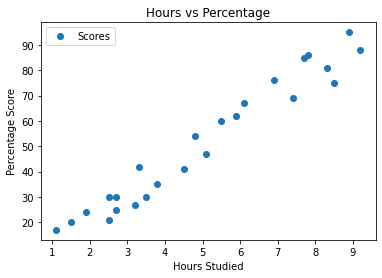

In [ ]:
# Plotting the distribution of scores
givendata.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph it is understood that, there is a positive linear relation between the number of hours student studied and corresponding percentage score**

#**Preparing the data**
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs)

In [ ]:
x = givendata.iloc[:, :-1].values
y = givendata.iloc[:, 1].values


Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.70 , random_state=30)

#**Training the model :**
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [ ]:
from sklearn.linear_model import LinearRegression
linearRegressor = LinearRegression()
linearRegressor.fit(x_train , y_train)
y_predict=linearRegressor.predict(x_train)

#**Training The Algorithm**
After splitting of data into training and testing data, should train the algorithm.

In [ ]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print("Training is complete")

Training is complete


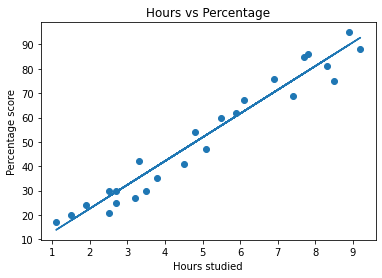

In [ ]:
#Now plot the regression line

line = regressor.coef_*x+regressor.intercept_

#Now plotting for the test data
plt.scatter(x,y)
plt.plot(x, line);
plt.title("Hours vs Percentage")
plt.xlabel("Hours studied")
plt.ylabel("Percentage score")
plt.show()

#**Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [ ]:
print("Test Score")
print(regressor.score(x_test, y_test))
print("Training Score")
print(regressor.score(x_train, y_train))

Test Score
0.9544461300269669
Training Score
0.9467849937663254


In [ ]:
y_test

array([85, 30, 69, 21, 76, 88, 30, 81])

In [ ]:
y_predict

array([62.60137601, 89.88264489, 60.65271395, 52.8580657 , 49.93507261,
       56.75538983, 29.47412095, 85.98532076, 13.88482445, 21.6794727 ,
       34.34577611, 47.01207951, 29.47412095, 40.1917623 , 35.32010714,
       79.16500355, 17.78214858])

In [ ]:
y_predict[:8]

array([62.60137601, 89.88264489, 60.65271395, 52.8580657 , 49.93507261,
       56.75538983, 29.47412095, 85.98532076])

In [ ]:
givendata = pd.DataFrame({"Actual": y_test, "Predicted": y_predict[:8]})
givendata

,Actual,Predicted
0,85,62.601376
1,30,89.882645
2,69,60.652714
3,21,52.858066
4,76,49.935073
5,88,56.755390
6,30,29.474121
7,81,85.985321


In [ ]:
#now predicting the score for 9.50 hours

print("Score of student who studies for 9.50 hours a day" , regressor.predict([[9.50]]))

Score of student who studies for 9.50 hours a day [95.72863108]


#**Model evaluation matrix**

In [ ]:
#Model efficiency check
mean_sq_error = mean_squared_error(y_test, y_predict[:8])
mean_ab_error = mean_absolute_error(y_test, y_predict[:8])
print("Mean Squared Error:",mean_sq_error)
print("Mean Absolute Error:",mean_ab_error)

Mean Squared Error: 856.6223908287454
Mean Absolute Error: 23.163419750006568
